In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# 3. Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [8]:
df = pd.read_pickle('datos/Invistico_Airline_v3.pkl')
df.head(2)

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Checkin service,Cleanliness,Online boarding,cat_retraso_salida,cat_retraso_llegada,cat_distance,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,1,3,1,1,0,0,0,2,2,...,5,3,2,< 15,< 15,<1000,1.691495,-1.671090,-0.386036,-0.392329
1,satisfied,0,3,1,2,0,0,0,3,0,...,2,3,2,120+,120+,1000-4000,0.500825,0.470348,7.786328,7.536854


In [9]:
df.drop(['cat_retraso_salida', 'cat_retraso_llegada', 'cat_distance'], axis=1, inplace=True)

In [10]:
# separamos los datos en X (variables predictoras) e y (variable respuesta)

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [11]:
# separamos los datos en los grupos de entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)

In [12]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train, y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test)

In [13]:
train_df_esta = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train)})
test_df_esta  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
9517,dissatisfied,dissatisfied,Train
117907,satisfied,satisfied,Train
96597,satisfied,satisfied,Train
64932,satisfied,satisfied,Train
99051,satisfied,satisfied,Train


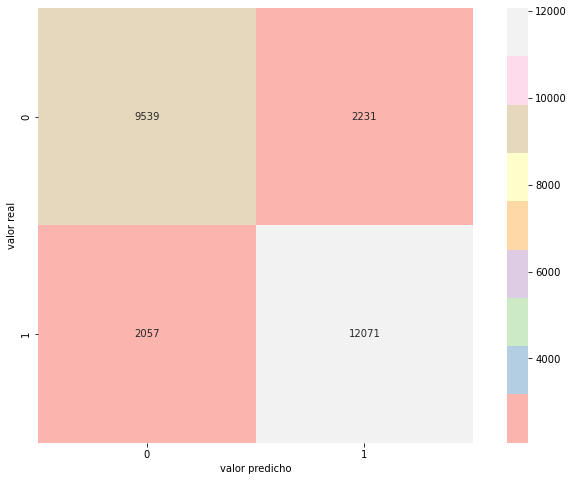

In [20]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap="Pastel1")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

# 4. Pair Programming Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

Calculad las métricas para vuestro modelo

Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?